In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

##  Importing data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Training DataSet")
display(train_df.head())
print("Shape of training dataset {}".format(train_df.shape))
print("\n\nTesting DataSet")
display(test_df.head())
print("Shape of testing dataset {}".format(test_df.shape))

Training DataSet


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


Shape of training dataset (89197, 10)


Testing DataSet


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


Shape of testing dataset (11121, 9)


## Describing the data

In [3]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_id,89197.0,NaN,NaN,NaN,44599.0,25749.100318,1.0,22300.0,44599.0,66898.0,89197.0
user_id,89197.0,NaN,NaN,NaN,13881.909806,8005.582771,1.0,6945.0,13892.0,20819.0,27734.0
category_id,89197.0,NaN,NaN,NaN,18.323733,11.675154,1.0,8.0,16.0,26.0,47.0
video_id,89197.0,NaN,NaN,NaN,77.715383,48.469656,1.0,34.0,76.0,120.0,175.0
age,89197.0,NaN,NaN,NaN,24.848616,8.955535,10.0,18.0,23.0,32.0,68.0
gender,89197,2,Male,52397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profession,89197,3,Student,44638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
followers,89197.0,NaN,NaN,NaN,252.460172,46.094468,160.0,230.0,240.0,280.0,360.0
views,89197.0,NaN,NaN,NaN,502.980268,268.569482,30.0,229.0,467.0,714.0,1000.0
engagement_score,89197.0,NaN,NaN,NaN,3.487797,0.863498,0.0,2.9,3.71,4.15,5.0


## Checking if userid is repeated ( user seen more than 1 video)

In [4]:
# Checking if we have duplicate user_id

train_df.user_id.value_counts()


7157     10
1448     10
13218    10
5198     10
13410    10
         ..
8046      2
21464     2
26529     2
20388     2
2047      2
Name: user_id, Length: 27734, dtype: int64

## Removed duplicate user's record for in-depth analysis of users

In [5]:
categorial_data = train_df[["gender", "profession", "user_id"]].drop_duplicates("user_id", keep="first")

print("After droping duplicate records: {}".format(len(categorial_data)))

After droping duplicate records: 27734


### User count as per profession and gender 

In [6]:
categorial_data.groupby(["gender", "profession"])["user_id"].count()

gender  profession          
Female  Other                   3379
        Student                 5515
        Working Professional    2205
Male    Other                   4957
        Student                 8366
        Working Professional    3312
Name: user_id, dtype: int64

### visualizing user count in pie chart 

Text(0.5, 1.0, 'Profession (Female)')

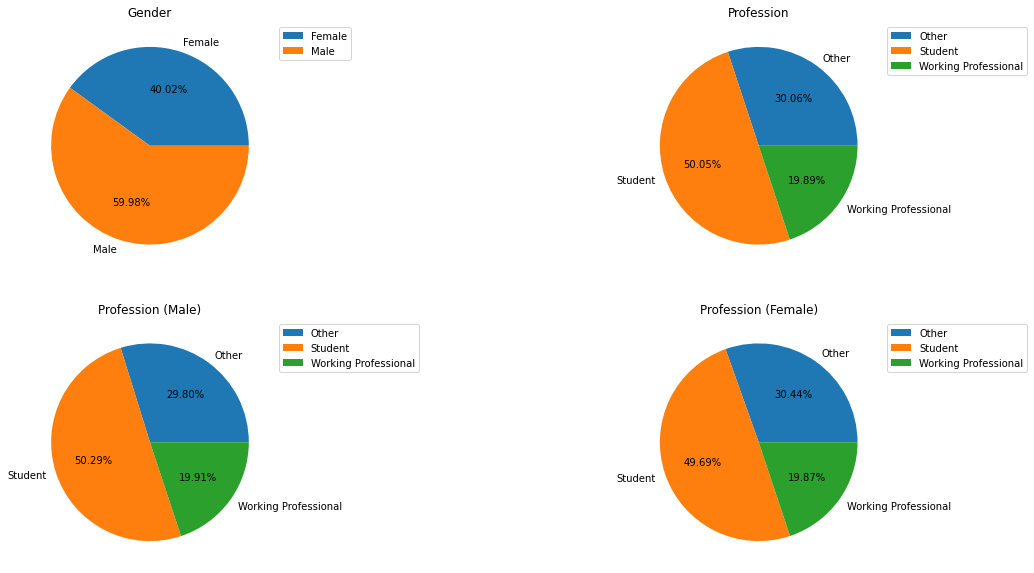

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

#creating plot for gender
gender_df = categorial_data.groupby(['gender']).count().reset_index()
ax1.pie(gender_df['user_id'], labels = gender_df['gender'], autopct ='%1.2f%%')
ax1.legend(gender_df['gender'], bbox_to_anchor=(1,1))
ax1.set_title("Gender")

#creating plot for age_group
prof_df = categorial_data.groupby(['profession']).count().reset_index()
ax2.pie(prof_df['user_id'], labels = prof_df['profession'], autopct ='%1.2f%%')
ax2.legend(prof_df['profession'], bbox_to_anchor=(1,1))
ax2.set_title("Profession")

male_prof_group_df = categorial_data[categorial_data['gender'] == 'Male'].groupby('profession').size()
ax3.pie(male_prof_group_df, labels = prof_df['profession'], autopct ='%1.2f%%')
ax3.legend(prof_df['profession'], bbox_to_anchor=(1,1))
ax3.set_title("Profession (Male)")

female_prof_group_df = categorial_data[categorial_data['gender'] == 'Female'].groupby('profession').size()
ax4.pie(female_prof_group_df, labels = prof_df['profession'], autopct ='%1.2f%%')
ax4.legend(prof_df['profession'],bbox_to_anchor=(1,1))
ax4.set_title("Profession (Female)")

## Top n records analysis

In [8]:
# Which category has highest view


#change the number if you want to the maximium number
count_top_values = 10

# 

In [9]:
topFollowers = train_df[['category_id', 'followers']].drop_duplicates().sort_values('followers').tail(count_top_values).sort_values('category_id').reset_index(drop=True)
print("Top {} category which have maximum followers".format(count_top_values))
display(topFollowers)

Top 10 category which have maximum followers


,category_id,followers
0,1,360
1,8,280
2,13,340
3,15,340
4,21,320
5,27,320
6,32,330
7,42,290
8,43,280
9,45,280


In [10]:
topFollowerByGender = train_df.groupby(['gender', 'category_id'])["followers"].sum().reset_index().groupby("gender").apply(lambda x: x.nlargest(count_top_values,['followers'])).reset_index(drop=True)#['gender', 'category_id']

# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

only_male = topFollowerByGender[ topFollowerByGender['gender'] =='Male'].reset_index(drop=True)
only_female = topFollowerByGender[ topFollowerByGender['gender'] =='Female'].reset_index(drop=True)

# render in output widgets
with widget1:
    print("Top {} category Followers by Male:".format(count_top_values))
    display(only_male)
with widget2:
    print("Top {} category Followers by Female:".format(count_top_values))
    display(only_female)

# create HBox
hbox = widgets.HBox([widget1, widget2])

# render hbox
hbox

In [11]:
topFollowerByProfession = train_df.groupby(['profession', 'category_id'])["followers"].sum().reset_index().groupby("profession").apply(lambda x: x.nlargest(count_top_values, ['followers'])).reset_index(drop=True)#['gender', 'category_id']


# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()
widget3 = widgets.Output()

only_other = topFollowerByProfession[ topFollowerByProfession['profession'] =='Other'].reset_index(drop=True)
only_student = topFollowerByProfession[ topFollowerByProfession['profession'] =='Student'].reset_index(drop=True)
only_WP = topFollowerByProfession[ topFollowerByProfession['profession'] =='Working Professional'].reset_index(drop=True)

# render in output widgets
with widget1:
    print("Top {} category Followers by Student:".format(count_top_values))
    display(only_student)
with widget2:
    print("Top {} category Followers by Working Professional:".format(count_top_values))
    display(only_WP)
with widget3:
    print("Top {} category Followers by Other:".format(count_top_values))
    display(only_other)

# create HBox
hbox = widgets.HBox([widget1, widget2, widget3])

# render hbox
hbox

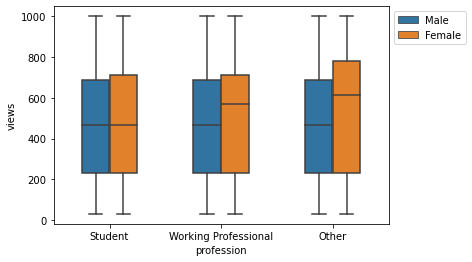

In [12]:
ax = sns.boxplot(x="profession", y='views', data=train_df, hue='gender', width=0.5 )
ax.legend(bbox_to_anchor=(1,1))
plt.show()

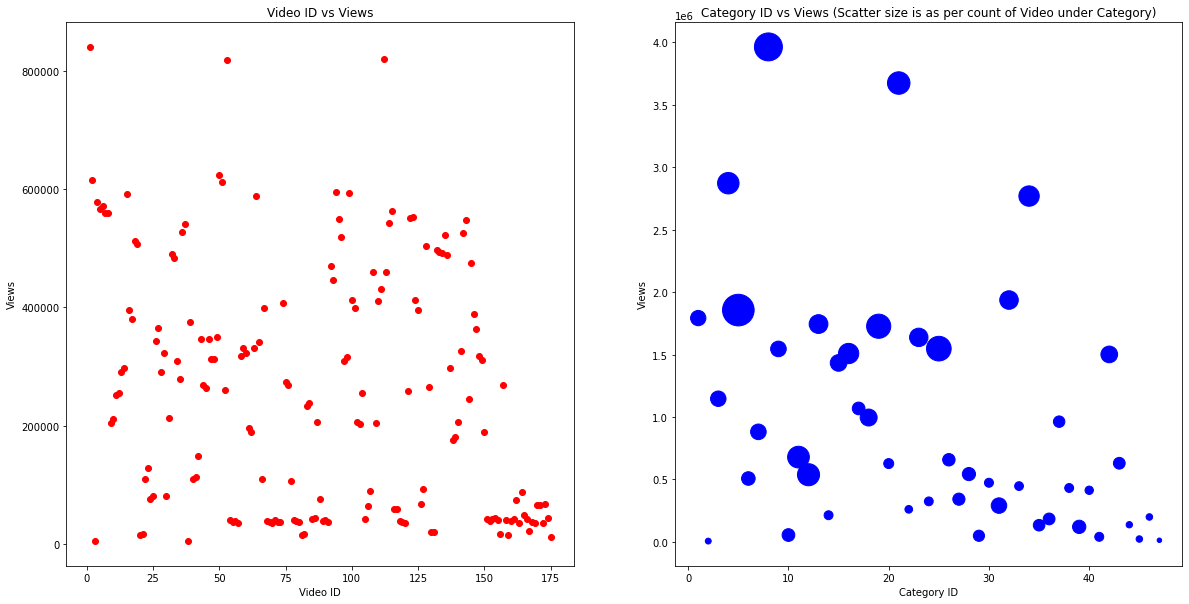

In [13]:
videoAggDf = train_df[['video_id', 'views']].groupby('video_id').sum().reset_index()
catAggDf = train_df[['category_id', 'views']].groupby('category_id').sum().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax1.scatter(videoAggDf.video_id, videoAggDf.views, color = "r")
ax1.set_xlabel("Video ID")
ax1.set_ylabel("Views")
ax1.set_title("Video ID vs Views")

size = MinMaxScaler(feature_range=(20, 1000)).fit_transform(train_df[['category_id', 'video_id']].groupby('category_id').count())
ax2.scatter(catAggDf.category_id, catAggDf.views, s = size, color = "b")
ax2.set_xlabel("Category ID")
ax2.set_ylabel("Views")
ax2.set_title("Category ID vs Views (Scatter size is as per count of Video under Category)")

plt.show()

In [14]:

#train_df.plot.scatter()

trainDF = train_df.copy()
profLabel = {'Student': 0, 'Working Professional':1, 'Other':2}
genderLabel = {'Male': 0, 'Female':1}
trainDF.profession = trainDF.profession.map(profLabel)
trainDF.gender = trainDF.gender.map(genderLabel)

column = ['user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score']
plotDF = trainDF[column]
plotDF.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,0,0,180,1000,4.33
1,5304,32,132,14,1,0,330,714,1.79
2,1840,12,24,19,0,0,180,138,4.35
3,12597,23,112,19,0,0,220,613,3.77
4,13626,23,112,27,0,1,220,613,3.13


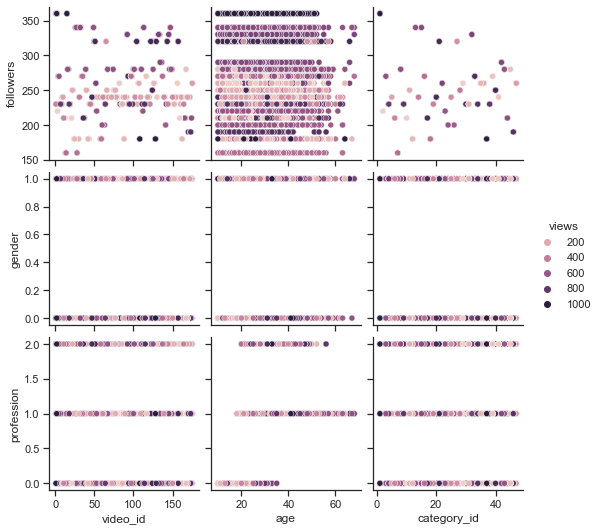

In [15]:
sns.set_theme(style="ticks")
sns.pairplot(plotDF, hue="views", x_vars=['video_id', 'age', 'category_id'], y_vars= ['followers', 'gender', 'profession'])
plt.show()

,age,followers,views,engagement_score
0,-0.094759,-1.572002,1.850629,0.975344
1,-1.211393,1.682203,0.785722,-1.966196
2,-0.653076,-1.572002,-1.358987,0.998506
3,-0.653076,-0.704214,0.409653,0.326816
4,0.240231,-0.704214,0.409653,-0.414360


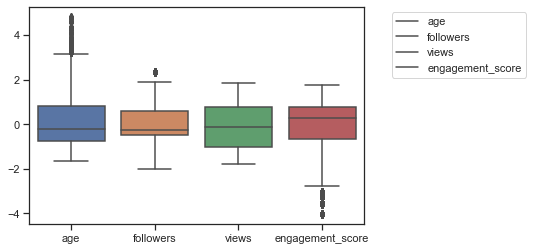

In [16]:
scaler = StandardScaler()

column = ['age', 'followers', 'views', 'engagement_score']
boxDF = trainDF[column]
scaler.fit(boxDF)
v = scaler.transform(boxDF)
df = pd.DataFrame(v, columns=column)
display(df.head())
ax = sns.boxplot(data=df )
ax.legend(df.columns, bbox_to_anchor=(1.5,1))
plt.show()